  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


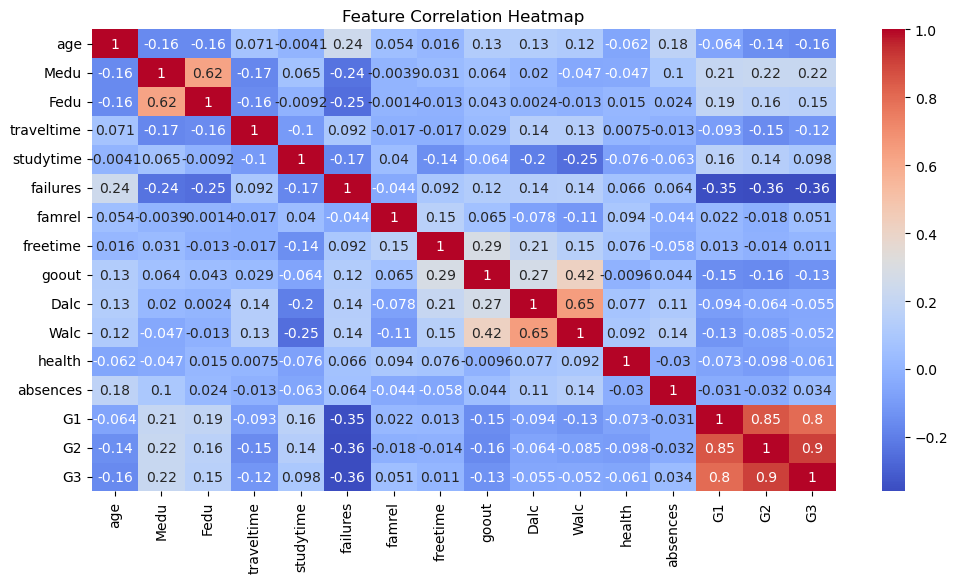

[16.18]
[[ 0.    3.23]
 [10.    9.87]
 [ 8.    8.51]
 [10.    9.68]
 [10.    6.91]
 [12.   10.92]
 [ 8.    7.41]
 [11.   12.12]
 [11.   11.54]
 [ 8.    8.54]
 [11.   12.39]
 [13.   14.23]
 [ 8.    7.36]
 [ 7.    8.68]
 [10.    9.49]
 [10.   11.54]
 [15.   15.44]
 [16.   16.18]
 [ 8.    2.77]
 [10.   10.64]
 [11.   11.29]
 [19.   18.16]
 [10.   10.33]
 [11.   12.04]
 [16.   15.28]
 [ 5.    5.81]
 [11.   11.07]
 [ 9.    9.51]
 [10.    9.88]
 [13.   13.71]
 [12.   12.57]
 [11.   12.31]
 [10.    8.57]
 [11.   10.97]
 [14.   12.49]
 [ 8.    8.53]
 [10.   11.42]
 [10.    9.18]
 [ 7.    8.83]
 [10.   11.2 ]
 [ 9.    9.97]
 [ 9.   10.89]
 [15.   15.89]
 [ 9.    8.18]
 [11.   10.92]
 [13.   12.22]
 [18.   18.17]
 [ 9.   10.52]
 [14.   13.01]
 [10.    9.22]
 [ 5.    5.04]
 [10.   12.07]
 [11.   11.61]
 [ 6.    6.48]
 [ 6.    6.88]
 [11.    9.31]
 [ 6.    6.95]
 [15.   15.27]
 [10.   10.16]
 [ 0.    0.13]
 [ 0.    4.33]
 [ 0.    4.95]
 [13.   12.79]
 [17.   16.46]
 [13.   14.68]
 [ 8.    8.89]
 [

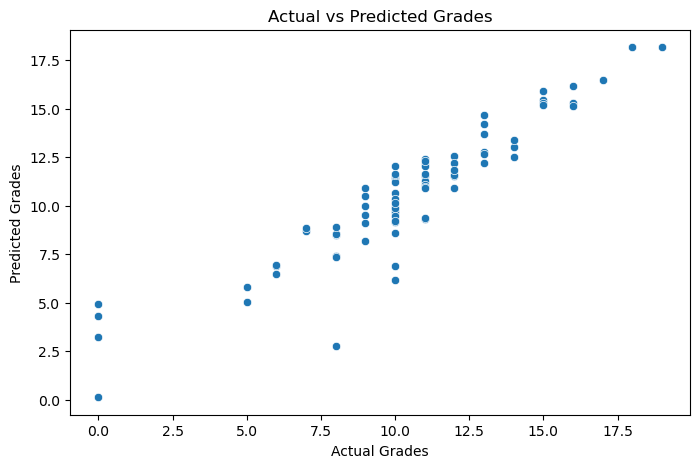

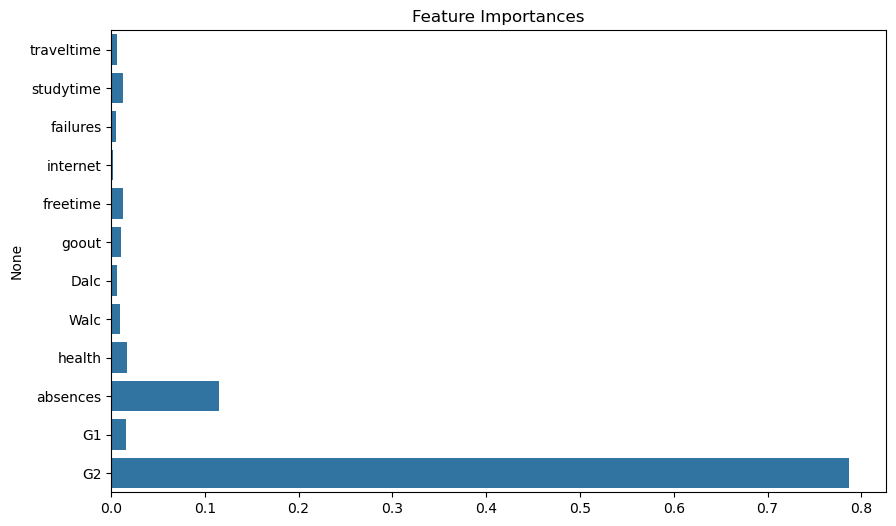

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, max_samples=0.7, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, max_samples=0.7, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, max_samples=0.7, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=log2, max_samples=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END criterion=poisson, max_depth=10, max_features=log2, max_samples=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END criterion=poisson, max_depth=20, max_features=log2, max_samples=0.7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; t

In [42]:
#student performance prediction 
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#loading dataset 
dataset = pd.read_csv("student-mat.csv",sep=";")
#Exploratory Data Analysis (EDA)
print(dataset.head())
print(dataset.describe())
print(dataset.isnull().sum())
# Correlation heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(12,6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#removing unnecessary features 
dataset.drop(dataset.columns[[0,1,2,3,4,5,6,7,8,9,10,11]],axis=1,inplace=True)
dataset.drop(dataset.columns[[3,4,5,6,7,8,10]],axis=1,inplace=True)
dataset.drop(dataset.columns[[4]],axis=1,inplace=True)
#separating independent and dependent features 
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 
#data encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#training the random forest regression model 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=1)
regressor.fit(x_train,y_train)
#making test set predictions 
y_pred = regressor.predict(x_test)
#making a single prediction 
result = regressor.predict([[2,1,0,1,4,5,3,4,2,3,14,16]])#16
print(result)
#comparing predicted and actual values 
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))
#getting r2_score - evaluating performance 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# Residual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()
#Feature Importance
importances = regressor.feature_importances_
features = dataset.drop('G3', axis=1).columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()
#hyperparameter tuning - randomised search cv 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100,200,300]
criterion = ["squared_error","absolute_error","friedman_mse","poisson"]
max_depth = [10,20,30]
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,5]
max_features = ["sqrt","log2"]
max_samples = [0.7,0.9,1.0]

parameters = dict(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_samples=max_samples)

random_search = RandomizedSearchCV(estimator=regressor,param_distributions=parameters,n_iter=30,cv=3,scoring='r2',n_jobs=-1,verbose=2,random_state=42)
random_search.fit(x_train,y_train)
best_parameters = random_search.best_params_
print(best_parameters)
best_score = random_search.best_score_
print(best_score)
#training the model again using best parameters 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,min_samples_split= 2,min_samples_leaf= 1,max_samples=1.0,max_features='sqrt',max_depth=10, criterion='squared_error',random_state=1)
regressor.fit(x_train,y_train)
#making test set predictions 
y_pred = regressor.predict(x_test)
#making a single prediction 
result = regressor.predict([[2,1,0,1,4,5,3,4,2,3,14,16]])#16
print(result)
#comparing predicted and actual values 
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))
#getting r2_score - evaluating performance 
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
#Save trained model
import joblib
joblib.dump(regressor, "student_model.pkl")
print("Model saved as student_model.pkl")

